In [36]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [10]:
penguim = sns.load_dataset('penguins')
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


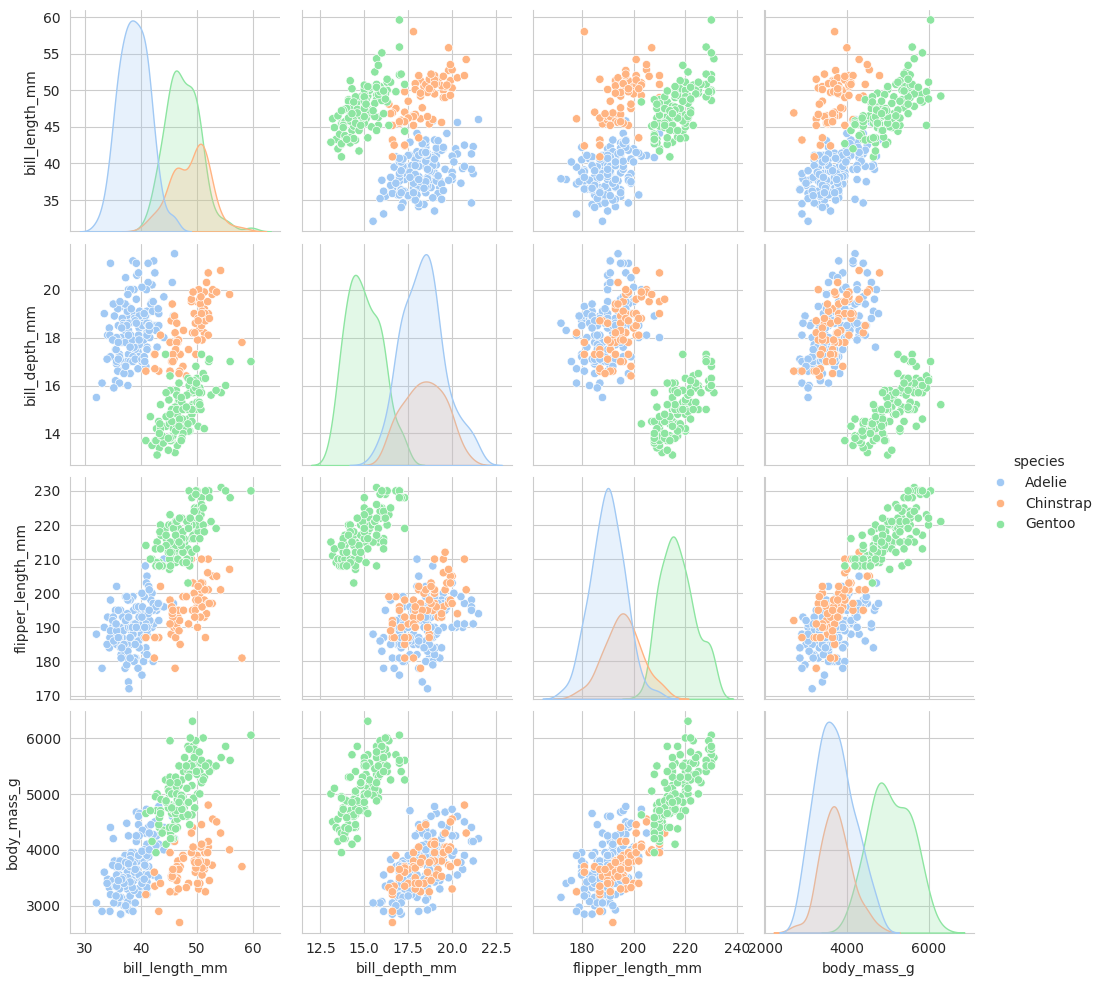

In [11]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

#### A specie gentoo tem numeros bem diferentes das outras duas, maioria dos graficos e ja as outras duas tem numeros bem parecidos

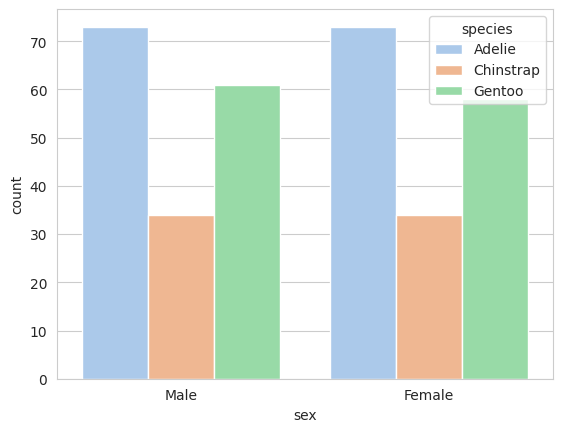

In [12]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

#### Sao praticamente iguas a quantidade de pinguis de acordo com a especie e o sexo

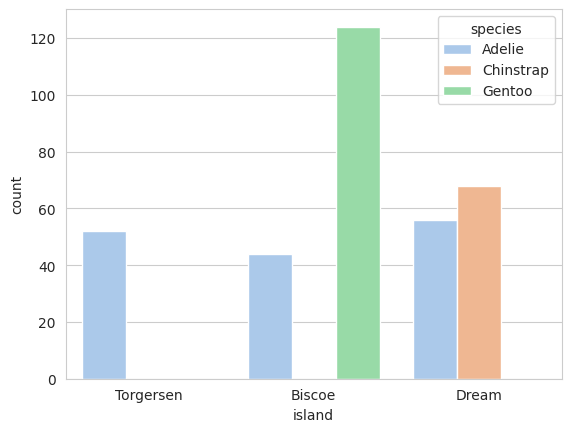

In [13]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

#### A specie adelie so vive em todas as ilhas sendo que nao torgersen ela vive sozinha, a especie gentoo so vive na ilha biscoe, e a chinstrap so vive na ilha dream

In [14]:
penguim.dropna(inplace=True)

In [15]:
penguim

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [16]:
penguim['island_Torgersen_nom'] = penguim['island'].apply(lambda x : 1 if x == 'Torgersen' else 0)

penguim['island_Biscoe_nom'] = penguim['island'].apply(lambda x : 1 if x == 'Biscoe' else 0)

penguim['island_Dream_nom'] = penguim['island'].apply(lambda x : 1 if x == 'Dream' else 0)

In [17]:
media_bill_length_mm = penguim['bill_length_mm'].mean()
devio_bill_length_mm = penguim['bill_length_mm'].std()

penguim['bill_length_mm_std'] = penguim['bill_length_mm'].apply(lambda x : (x - media_bill_length_mm) / devio_bill_length_mm)

In [18]:
media_bill_depth_mm = penguim['bill_depth_mm'].mean()
desvio_bill_depth_mm = penguim['bill_depth_mm'].std()

penguim['bill_depth_mm_std'] = penguim['bill_depth_mm'].apply(lambda x : (x - media_bill_depth_mm) / desvio_bill_depth_mm)

In [19]:
media_flipper_length_mm = penguim['flipper_length_mm'].mean()
devio_flipper_length_mm = penguim['flipper_length_mm'].std()

penguim['flipper_length_mm_std'] = penguim['flipper_length_mm'].apply(lambda x : (x - media_flipper_length_mm) / devio_flipper_length_mm)

In [21]:
media_body_mass = penguim['body_mass_g'].mean()
desvio_body_mass = penguim['body_mass_g'].std()

penguim['body_mass_g_std'] = penguim['body_mass_g'].apply(lambda x : (x - media_body_mass) / desvio_body_mass)

In [22]:
penguim['sex_male_nom'] = penguim['sex'].apply(lambda x : 1 if x == 'Male' else 0)

penguim['sex_female_nom'] = penguim['sex'].apply(lambda x : 1 if x == 'Female' else 0)

In [23]:
penguim

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_male_nom,sex_female_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0,-0.894695,0.779559,-1.424608,-0.567621,1,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0,-0.821552,0.119404,-1.067867,-0.505525,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0,-0.675264,0.424091,-0.425733,-1.188572,0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0,-1.333559,1.084246,-0.568429,-0.940192,0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0,-0.858123,1.744400,-0.782474,-0.691811,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,0,1,0,0.586470,-1.759497,0.929884,0.891616,0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0,1,0,0.513326,-1.454811,1.001232,0.798473,0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0,1,0,1.171621,-0.743875,1.500670,1.916186,1,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0,1,0,0.220750,-1.200905,0.787187,1.233139,0,1


In [24]:
penguim.drop(columns={'island','bill_length_mm','bill_depth_mm','flipper_length_mm','sex','body_mass_g'},inplace= True)

In [25]:
penguim

,species,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_male_nom,sex_female_nom
0,Adelie,1,0,0,-0.894695,0.779559,-1.424608,-0.567621,1,0
1,Adelie,1,0,0,-0.821552,0.119404,-1.067867,-0.505525,0,1
2,Adelie,1,0,0,-0.675264,0.424091,-0.425733,-1.188572,0,1
4,Adelie,1,0,0,-1.333559,1.084246,-0.568429,-0.940192,0,1
5,Adelie,1,0,0,-0.858123,1.744400,-0.782474,-0.691811,1,0
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,0,1,0,0.586470,-1.759497,0.929884,0.891616,0,1
340,Gentoo,0,1,0,0.513326,-1.454811,1.001232,0.798473,0,1
341,Gentoo,0,1,0,1.171621,-0.743875,1.500670,1.916186,1,0
342,Gentoo,0,1,0,0.220750,-1.200905,0.787187,1.233139,0,1


In [27]:
predictors_train,predictors_test,target_train,target_test = train_test_split(
    penguim.drop(['species'],axis = 1),
    penguim['species'],
    test_size = 0.25,
    random_state = 123
)

In [29]:
model = DecisionTreeClassifier()
model = model.fit(predictors_train,target_train)
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['island_Torgersen_nom', 'island_Biscoe_nom', 'island_Dream_nom',
        'bill_length_mm_std', 'bill_depth_mm_std', 'flipper_length_mm_std',
        'body_mass_g_std', 'sex_male_nom', 'sex_female_nom'], dtype=object),
 'n_features_in_': 9,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': np.int64(3),
 'max_features_': 9,
 'tree_': <sklearn.tree._tree.Tree at 0x1f4db193ec0>}

In [32]:
target_predicted = model.predict(predictors_test)

In [35]:
confusion_matrix = confusion_matrix(target_test,target_predicted)

print(confusion_matrix)

[[35  0  0]
 [ 4 22  0]
 [ 0  0 23]]


#### ela so errou 4x de 80 

In [37]:
acuracia = accuracy_score(target_test,target_predicted)
print(acuracia)

0.9523809523809523


In [38]:
penguim

,species,island_Torgersen_nom,island_Biscoe_nom,island_Dream_nom,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,sex_male_nom,sex_female_nom
0,Adelie,1,0,0,-0.894695,0.779559,-1.424608,-0.567621,1,0
1,Adelie,1,0,0,-0.821552,0.119404,-1.067867,-0.505525,0,1
2,Adelie,1,0,0,-0.675264,0.424091,-0.425733,-1.188572,0,1
4,Adelie,1,0,0,-1.333559,1.084246,-0.568429,-0.940192,0,1
5,Adelie,1,0,0,-0.858123,1.744400,-0.782474,-0.691811,1,0
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,0,1,0,0.586470,-1.759497,0.929884,0.891616,0,1
340,Gentoo,0,1,0,0.513326,-1.454811,1.001232,0.798473,0,1
341,Gentoo,0,1,0,1.171621,-0.743875,1.500670,1.916186,1,0
342,Gentoo,0,1,0,0.220750,-1.200905,0.787187,1.233139,0,1


In [41]:
penguim_test_lenght =  (38.2 - media_bill_length_mm) / devio_bill_length_mm
penguim_test_deph = (18.1 - media_bill_depth_mm) / desvio_bill_depth_mm
penguim_test_flipper = (185.0 - media_flipper_length_mm) / devio_flipper_length_mm
penguim_test_body = (3950.0 - media_body_mass) / desvio_body_mass


In [42]:
test = np.array([0,1,0,penguim_test_lenght,penguim_test_deph,penguim_test_flipper,penguim_test_body,1,0])
resposta = model.predict(test.reshape(1,-1))
resposta

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Adelie'], dtype=object)